In [1]:
from matplotlib_venn import venn3
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import subprocess
import math
import sys
import os

In [2]:
immuno_path = "../../data/genotyping/IMMUNO/"
neurox_path = "../../data/genotyping/NEUROX/"

In [3]:
immuno_bim = pd.read_csv(
    os.path.join(immuno_path, "IMMUNO_hg19.bim"),
    sep = "\t",
    header = None
)
immuno_bim.head(n=10)

,0,1,2,3,4,5
0,1,imm_1_898835,0,908972,0,A
1,1,vh_1_1108138,0,1118275,T,C
2,1,vh_1_1110294,0,1120431,A,G
3,1,rs9729550,0,1135242,C,A
4,1,rs1815606,0,1140435,T,G
5,1,rs7515488,0,1163804,T,C
6,1,rs11260562,0,1165310,A,G
7,1,rs6697886,0,1173611,A,G
8,1,1_1168711,0,1178848,A,G
9,1,rs6603785,0,1186502,T,A


In [4]:
neurox_bim = pd.read_csv(
    os.path.join(neurox_path, "NEUROX.bim"),
    sep = "\t",
    header = None
)
neurox_bim.head(n=10)

,0,1,2,3,4,5
0,1,NeuroX_PARK7_Pro158del,0,0,0,I
1,1,NeuroX_PINK1_23bp_del_ex7,0,0,0,I
2,1,NeuroX_PINK1_534_535insQ,0,0,0,D
3,1,NeuroX_PINK1_Asp525fs,0,0,0,D
4,1,NeuroX_PINK1_Cys549fs,0,0,0,I
5,1,NeuroX_PINK1_Lys520fs,0,0,0,I
6,1,exm2268640,0,762320,T,C
7,1,exm41,0,861349,0,C
8,1,exm1916089,0,865545,0,0
9,1,exm44,0,865584,0,G


### Lifting

Missingness

In [5]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_hg19")} --missing --out {os.path.join(immuno_path, "IMMUNO_hg19")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_hg19.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_hg19
  --missing
  --out ../../data/genotyping/IMMUNO/IMMUNO_hg19

16384 MB RAM detected; reserving 8192 MB for main workspace.
196520 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_hg19.hh ); many commands treat these as
missing.
treat these as missing.
Total genotyping rate is 0.957444.
--missing:

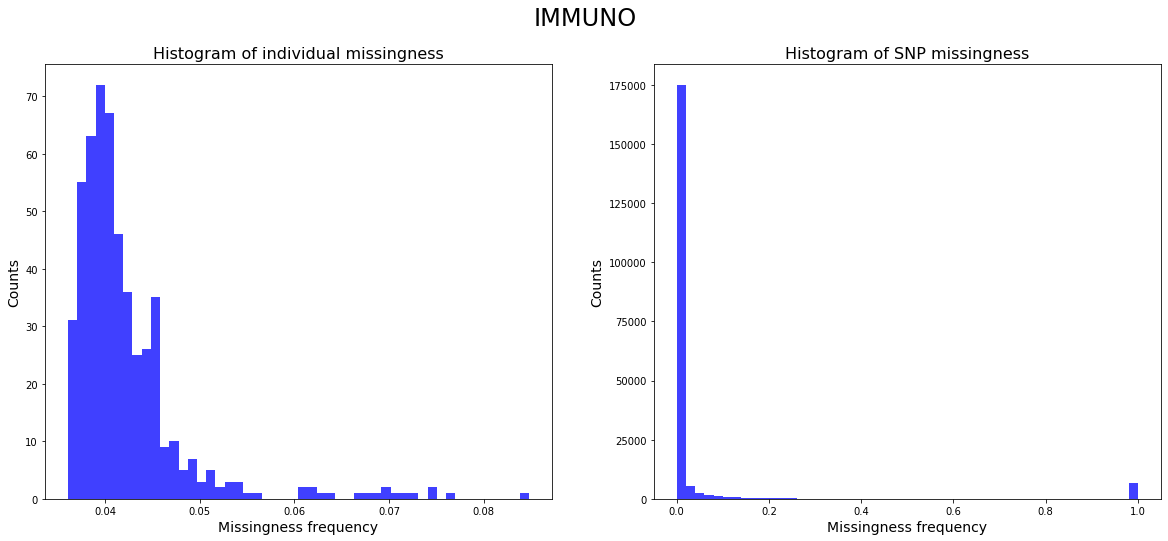

In [6]:
immuno_indmiss = pd.read_csv(
    os.path.join(immuno_path, "IMMUNO_hg19.imiss"),
    sep = "\s+"
)
immuno_snpmiss = pd.read_csv(
    os.path.join(immuno_path, "IMMUNO_hg19.lmiss"),
    sep = "\s+"
)

f, axes = plt.subplots(1,2, figsize=(20,8))
n, bins, patches = axes[0].hist(
    immuno_indmiss.F_MISS.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
axes[0].set_xlabel("Missingness frequency", size=14)
axes[0].set_ylabel("Counts", size=14)
axes[0].set_title("Histogram of individual missingness", size=16)
n, bins, patches = axes[1].hist(
    immuno_snpmiss.F_MISS.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
axes[1].set_xlabel("Missingness frequency", size=14)
axes[1].set_ylabel("Counts", size=14)
axes[1].set_title("Histogram of SNP missingness", size=16)
plt.suptitle("IMMUNO", size=24)
plt.show()

In [7]:
!plink --bfile {os.path.join(neurox_path, "NEUROX")} --missing --out {os.path.join(neurox_path, "NEUROX")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/NEUROX/NEUROX.log.
Options in effect:
  --bfile ../../data/genotyping/NEUROX/NEUROX
  --missing
  --out ../../data/genotyping/NEUROX/NEUROX

16384 MB RAM detected; reserving 8192 MB for main workspace.
267607 variants loaded from .bim file.
619 people (409 males, 210 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 619 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/NEUROX/NEUROX.hh ); many commands treat these as missing.
treat these as missing.
Total genotyping rate is 0.957634.
--missing: Sample missing data

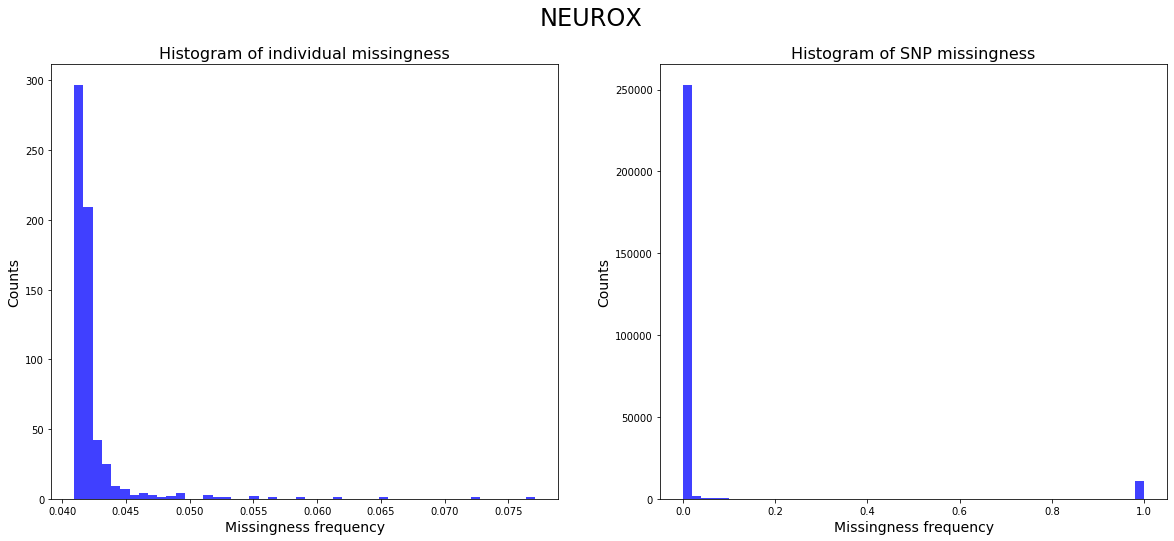

In [8]:
neurox_indmiss = pd.read_csv(
    os.path.join(neurox_path, "NEUROX.imiss"),
    sep = "\s+"
)
neurox_snpmiss = pd.read_csv(
    os.path.join(neurox_path, "NEUROX.lmiss"),
    sep = "\s+"
)

f, axes = plt.subplots(1,2, figsize=(20,8))
n, bins, patches = axes[0].hist(
    neurox_indmiss.F_MISS.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
axes[0].set_xlabel("Missingness frequency", size=14)
axes[0].set_ylabel("Counts", size=14)
axes[0].set_title("Histogram of individual missingness", size=16)
n, bins, patches = axes[1].hist(
    neurox_snpmiss.F_MISS.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
axes[1].set_xlabel("Missingness frequency", size=14)
axes[1].set_ylabel("Counts", size=14)
axes[1].set_title("Histogram of SNP missingness", size=16)
plt.suptitle("NEUROX", size=24)
plt.show()

In [9]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_hg19")} --geno 0.2 --make-bed --out {os.path.join(immuno_path, "IMMUNO_qc_geno")}
!plink --bfile {os.path.join(neurox_path, "NEUROX")} --geno 0.2 --make-bed --out {os.path.join(neurox_path, "NEUROX_qc_geno")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_qc_geno.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_hg19
  --geno 0.2
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_qc_geno

16384 MB RAM detected; reserving 8192 MB for main workspace.
196520 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_qc_geno.hh ); many commands treat these as
missing.
treat these as missing.
Total genotyping rate 

In [10]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_geno")} --mind 0.2 --make-bed --out {os.path.join(immuno_path, "IMMUNO_qc_mind")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_geno")} --mind 0.2 --make-bed --out {os.path.join(neurox_path, "NEUROX_qc_mind")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_qc_mind.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_geno
  --make-bed
  --mind 0.2
  --out ../../data/genotyping/IMMUNO/IMMUNO_qc_mind

16384 MB RAM detected; reserving 8192 MB for main workspace.
188317 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_qc_mind.hh ); many commands treat these

In [11]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_mind")} --geno 0.05 --make-bed --out {os.path.join(immuno_path, "IMMUNO_qc_geno2")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_mind")} --geno 0.05 --make-bed --out {os.path.join(neurox_path, "NEUROX_qc_geno2")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_qc_geno2.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_mind
  --geno 0.05
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_qc_geno2

16384 MB RAM detected; reserving 8192 MB for main workspace.
188317 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_qc_geno2.hh ); many commands treat these as
missing.
treat these as missing.
Total genotypin

In [12]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_geno2")} --mind 0.05 --make-bed --out {os.path.join(immuno_path, "IMMUNO_qc_mind2")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_geno2")} --mind 0.05 --make-bed --out {os.path.join(neurox_path, "NEUROX_qc_mind2")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_qc_mind2.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_geno2
  --make-bed
  --mind 0.05
  --out ../../data/genotyping/IMMUNO/IMMUNO_qc_mind2

16384 MB RAM detected; reserving 8192 MB for main workspace.
182254 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_qc_mind2.hh ); many commands treat 

Sex discrepancies

In [16]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_mind2")} --check-sex --out {os.path.join(immuno_path, "IMMUNO_checksex")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_mind2")} --check-sex --out {os.path.join(neurox_path, "NEUROX_checksex")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_checksex.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_mind2
  --check-sex
  --out ../../data/genotyping/IMMUNO/IMMUNO_checksex

16384 MB RAM detected; reserving 8192 MB for main workspace.
182254 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_checksex.hh ); many commands treat these as
missing.
treat these as missing.
Total genotyping rate is 0.

[[Text(0, 0, 'Males'), Text(0, 0, 'Females')]]

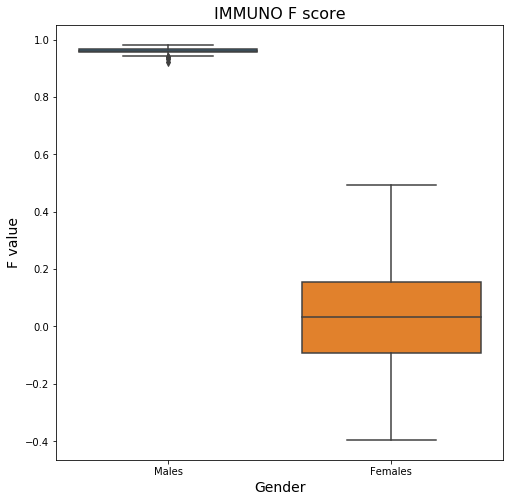

In [44]:
immuno_checksex = pd.read_csv(
    os.path.join(immuno_path, "IMMUNO_checksex.sexcheck"),
    sep="\s+"
)

plt.figure(figsize=(8,8))
p = sns.boxplot(data=immuno_checksex, x="PEDSEX", y="F")  # males should have F > 0.8 and females < 0.2
plt.xlabel("Gender", size=14)
plt.ylabel("F value", size=14)
plt.title("IMMUNO F score", size=16)
p.set(xticklabels=["Males", "Females"])

In [38]:
np.all(np.array(immuno_checksex[immuno_checksex.STATUS == "PROBLEM"].PEDSEX.tolist()) == 2)  # problems all females: expected!

True

In [41]:
immuno_checksex[immuno_checksex.STATUS == "PROBLEM"].iloc[:,0:2].to_csv(
    os.path.join(immuno_path, "subjs_toremove.txt"),
    sep=" ",
    index=False
)
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_mind2")} --remove {os.path.join(immuno_path, "subjs_toremove.txt")} --make-bed --out {os.path.join(immuno_path, "IMMUNO_qc_subjs")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_qc_subjs.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_mind2
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_qc_subjs
  --remove ../../data/genotyping/IMMUNO/subjs_toremove.txt

16384 MB RAM detected; reserving 8192 MB for main workspace.
182254 variants loaded from .bim file.
523 people (343 males, 180 females) loaded from .fam.
--remove: 492 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 492 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/IMMUNO/IMMUNO_qc_subjs.hh );

[[Text(0, 0, 'Males'), Text(0, 0, 'Females')]]

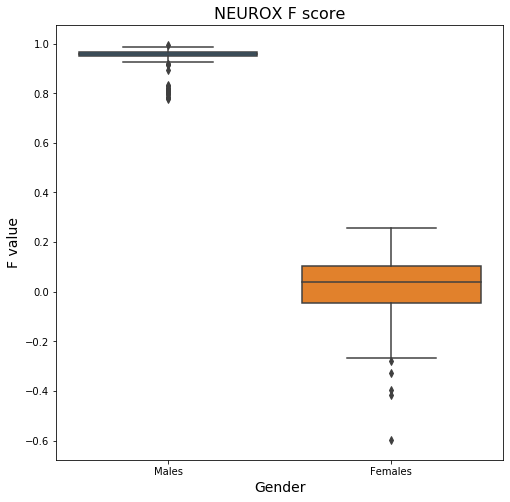

In [45]:
neurox_checksex = pd.read_csv(
    os.path.join(neurox_path, "NEUROX_checksex.sexcheck"),
    sep="\s+"
)

plt.figure(figsize=(8,8))
p = sns.boxplot(data=neurox_checksex, x="PEDSEX", y="F")  # males should have F > 0.8 and females < 0.2
plt.xlabel("Gender", size=14)
plt.ylabel("F value", size=14)
plt.title("NEUROX F score", size=16)
p.set(xticklabels=["Males", "Females"])

In [46]:
np.all(np.array(neurox_checksex[neurox_checksex.STATUS == "PROBLEM"].PEDSEX.tolist()) == 2)  # problems all females: expected!

False

In [47]:
neurox_checksex[neurox_checksex.STATUS == "PROBLEM"].iloc[:,0:2].to_csv(
    os.path.join(neurox_path, "subjs_toremove.txt"),
    sep=" ",
    index=False
)
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_mind2")} --remove {os.path.join(neurox_path, "subjs_toremove.txt")} --make-bed --out {os.path.join(neurox_path, "NEUROX_qc_subjs")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/NEUROX/NEUROX_qc_subjs.log.
Options in effect:
  --bfile ../../data/genotyping/NEUROX/NEUROX_qc_mind2
  --make-bed
  --out ../../data/genotyping/NEUROX/NEUROX_qc_subjs
  --remove ../../data/genotyping/NEUROX/subjs_toremove.txt

16384 MB RAM detected; reserving 8192 MB for main workspace.
254889 variants loaded from .bim file.
619 people (409 males, 210 females) loaded from .fam.
--remove: 607 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 607 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
../../data/genotyping/NEUROX/NEUROX_qc_subjs.hh );

MAF

In [48]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_qc_subjs")} --autosome --make-bed --out {os.path.join(immuno_path, "IMMUNO_auto")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_qc_subjs")} --autosome --make-bed --out {os.path.join(neurox_path, "NEUROX_auto")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_auto.log.
Options in effect:
  --autosome
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_qc_subjs
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_auto

16384 MB RAM detected; reserving 8192 MB for main workspace.
178767 out of 182254 variants loaded from .bim file.
492 people (343 males, 149 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 492 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997279.
178767 variants and 492 people pass filters and QC.
Note: No phenotypes present.
--make

In [49]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_auto")} --freq --out {os.path.join(immuno_path, "IMMUNO_freq")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_auto")} --freq --out {os.path.join(neurox_path, "NEUROX_freq")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_freq.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_auto
  --freq
  --out ../../data/genotyping/IMMUNO/IMMUNO_freq

16384 MB RAM detected; reserving 8192 MB for main workspace.
178767 variants loaded from .bim file.
492 people (343 males, 149 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 492 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997279.
--freq: Allele frequencies (founders only) written to
../../data/genotyping/IMMUNO/IMMUNO_freq.frq .
PLINK v1.90b6.12 64-b

Text(0.5, 1.0, 'Histogram of MAF (IMMUNO)')

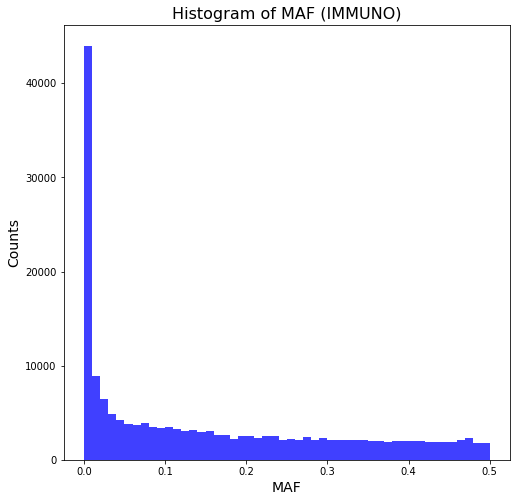

In [52]:
immuno_freq = pd.read_csv(
    os.path.join(immuno_path, "IMMUNO_freq.frq"),
    sep="\s+"
)

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(
    immuno_freq.MAF.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
plt.xlabel("MAF", size=14)
plt.ylabel("Counts", size=14)
plt.title("Histogram of MAF (IMMUNO)", size=16)

Text(0.5, 1.0, 'Histogram of MAF (NEUROX)')

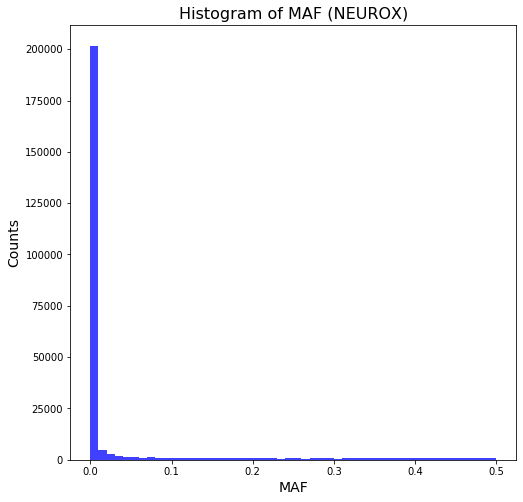

In [53]:
neurox_freq = pd.read_csv(
    os.path.join(neurox_path, "NEUROX_freq.frq"),
    sep="\s+"
)

plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(
    neurox_freq.MAF.tolist(), 
    50,
    facecolor="blue", 
    alpha=0.75
)
plt.xlabel("MAF", size=14)
plt.ylabel("Counts", size=14)
plt.title("Histogram of MAF (NEUROX)", size=16)

In [57]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_auto")} --maf 0.001 --make-bed --out {os.path.join(immuno_path, "IMMUNO_maf")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_auto")} --maf 0.001 --make-bed --out {os.path.join(neurox_path, "NEUROX_maf")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_maf.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_auto
  --maf 0.001
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_maf

16384 MB RAM detected; reserving 8192 MB for main workspace.
178767 variants loaded from .bim file.
492 people (343 males, 149 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 492 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997279.
22957 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
155810 variants

HWE

In [58]:
!plink --bfile {os.path.join(immuno_path, "IMMUNO_maf")} --hwe 1e-6 --make-bed --out {os.path.join(immuno_path, "IMMUNO_hwe")}
!plink --bfile {os.path.join(neurox_path, "NEUROX_maf")} --hwe 1e-6 --make-bed --out {os.path.join(neurox_path, "NEUROX_hwe")}

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/IMMUNO/IMMUNO_hwe.log.
Options in effect:
  --bfile ../../data/genotyping/IMMUNO/IMMUNO_maf
  --hwe 1e-6
  --make-bed
  --out ../../data/genotyping/IMMUNO/IMMUNO_hwe

16384 MB RAM detected; reserving 8192 MB for main workspace.
155810 variants loaded from .bim file.
492 people (343 males, 149 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 492 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.997229.
--hwe: 177 variants removed due to Hardy-Weinberg exact test.
155633 variants and 492 people pass filters an